# Part 1: Theoretical Understanding

### Q1. Explain the concept of a Decision Tree. What kind of problems is it best suited for?

A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression tasks. It is a flowchart-like structure where each internal node represents a "test" on an attribute (e.g., whether a coin flip is heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from the root to a leaf represent classification rules.

Decision trees are particularly well-suited for the following types of problems:

*   **Classification Problems:** Where the goal is to predict a categorical class label. For example, classifying an email as "spam" or "not spam".
*   **Regression Problems:** Where the goal is to predict a continuous value. For instance, predicting the price of a house.
*   **Problems requiring high interpretability:** The tree-like structure is easy to understand and visualize, making it straightforward to explain the model's decisions.
*   **Problems with non-linear relationships:** Decision trees can capture complex non-linear relationships between features and the target variable.

### Q2. Define the following terms with examples:

*   **Root Node:** The topmost node in a decision tree. It represents the entire dataset, which gets divided into two or more homogeneous sets. For example, in a dataset of animals, the root node could be a question like "Does it have feathers?".

*   **Leaf Node:** A terminal node in a decision tree that does not split any further. It represents a final decision or a class label. For instance, if the answer to "Does it have feathers?" is "yes," the leaf node might be "Bird."

*   **Internal Node:** A node that represents a test on a feature and splits the data into sub-nodes. It has branches leading to other nodes. For example, an internal node could be "Is the animal's habitat water?".

*   **Branch:** A connection between nodes, representing the outcome of a test on a feature. For example, from the internal node "Is the animal's habitat water?", there could be two branches: "Yes" and "No".

### Q3. What is Entropy? How is it used in a Decision Tree? Provide a mathematical example.

Entropy is a measure of impurity or randomness in a dataset. In the context of a decision tree, it is used to measure the impurity of a node. A node with high entropy has a mix of different classes, while a node with zero entropy has only one class.

The formula for entropy is:
Entropy(S) = -p_pos * log2(p_pos) - p_neg * log2(p_neg)

Where:
-  `S` is the set of examples.
-  `p_pos` is the proportion of positive examples in S.
-  `p_neg` is the proportion of negative examples in S.

In a decision tree, the goal is to split the nodes in a way that reduces entropy. The split that results in the largest decrease in entropy (highest information gain) is chosen.

**Mathematical Example:**
Consider a set of 10 mushrooms, where 6 are poisonous (positive) and 4 are edible (negative).

-   p_pos = 6/10 = 0.6
-   p_neg = 4/10 = 0.4

Entropy(S) = -0.6 * log2(0.6) - 0.4 * log2(0.4)
Entropy(S) = -0.6 * (-0.737) - 0.4 * (-1.322)
Entropy(S) = 0.4422 + 0.5288 = 0.971

This entropy value of 0.971 indicates a relatively high level of impurity in the set.

### Q4. What is Information Gain? How does it help in building a Decision Tree? Show a small example using a feature with two values.

Information Gain is the measure of the reduction in entropy after a dataset is split on a particular attribute. It helps in building a decision tree by providing a criterion for selecting the best feature to split on at each node. The feature with the highest information gain is chosen as the splitting feature.

The formula for Information Gain is:
Information Gain(S, A) = Entropy(S) - Σ (|S_v| / |S|) * Entropy(S_v)

Where:
-  `S` is the set of examples.
-  `A` is the attribute to be split on.
-  `S_v` is the subset of S for which attribute A has value v.

**Example:**
Let's continue with our 10 mushrooms (6 poisonous, 4 edible). Suppose we have a feature "Cap Shape" with two values: "Convex" and "Flat".

-   Of the 10 mushrooms, 5 have a "Convex" cap, and 5 have a "Flat" cap.
-   Of the 5 "Convex" mushrooms, 4 are poisonous and 1 is edible.
-   Of the 5 "Flat" mushrooms, 2 are poisonous and 3 are edible.

**Entropy of "Convex" subset:**
-   p_pos = 4/5 = 0.8
-   p_neg = 1/5 = 0.2
-   Entropy(Convex) = -0.8 * log2(0.8) - 0.2 * log2(0.2) = 0.722

**Entropy of "Flat" subset:**
-   p_pos = 2/5 = 0.4
-   p_neg = 3/5 = 0.6
-   Entropy(Flat) = -0.4 * log2(0.4) - 0.6 * log2(0.6) = 0.971

**Information Gain for "Cap Shape":**
-   Information Gain(S, Cap Shape) = Entropy(S) - [(5/10) * Entropy(Convex) + (5/10) * Entropy(Flat)]
-   Information Gain(S, Cap Shape) = 0.971 - [0.5 * 0.722 + 0.5 * 0.971]
-   Information Gain(S, Cap Shape) = 0.971 - [0.361 + 0.4855] = 0.1245

This value would be compared to the information gain of other features to decide the best split.

### Q5. Compare Gini Impurity and Entropy as criteria in Decision Trees. When would you prefer one over the other?

Both Gini Impurity and Entropy are used to measure the impurity of a node in a decision tree.

**Gini Impurity:**
Gini Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
Gini(S) = 1 - Σ (p_i)^2

**Entropy:**
Entropy, as explained before, is a measure of the amount of uncertainty or randomness in the data.
Entropy(S) = -Σ p_i * log2(p_i)

**Comparison:**
*   **Computational Speed:** Gini impurity is generally faster to compute as it does not involve logarithmic calculations.
*   **Sensitivity:** Entropy is slightly more sensitive to changes in the probability distribution of the classes.
*   **Resulting Trees:** In practice, the choice between Gini impurity and entropy often results in very similar trees.

**When to prefer one over the other:**
*   **Gini Impurity:** It is the default criterion in many decision tree implementations (like scikit-learn) due to its computational efficiency. For most practical purposes, it is a good choice.
*   **Entropy:** If you want to be more sensitive to the finer details of the data's probability distribution, entropy might be a better choice. It can be particularly useful when dealing with features that have a large number of possible values.

# Part 2: Practical Implementation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Q1. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('mushrooms.csv')

# Show the shape
print("Shape of the dataset:", df.shape)

# Check for null values
print("\nNull values check:")
print(df.isnull().sum())

# Display the number of edible vs poisonous mushrooms
print("\nClass distribution:")
print(df['class'].value_counts())

Shape of the dataset: (8124, 23)

Null values check:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Class distribution:
class
e    4208
p    3916
Name: count, dtype: int64


### Q2. Encode Categorical Features

In [3]:
# Apply Label Encoding
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the transformed feature space
print("Transformed feature space (first 5 rows):")
print(df.head())

Transformed feature space (first 5 rows):
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below

### Q3. Train-Test Split

In [4]:
# Split the dataset
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6499, 22)
Testing set shape: (1625, 22)


### Q4. Build a Decision Tree Classifier

In [5]:
# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Print accuracies
print("Training accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


### Q5. Visualize the Decision Tree

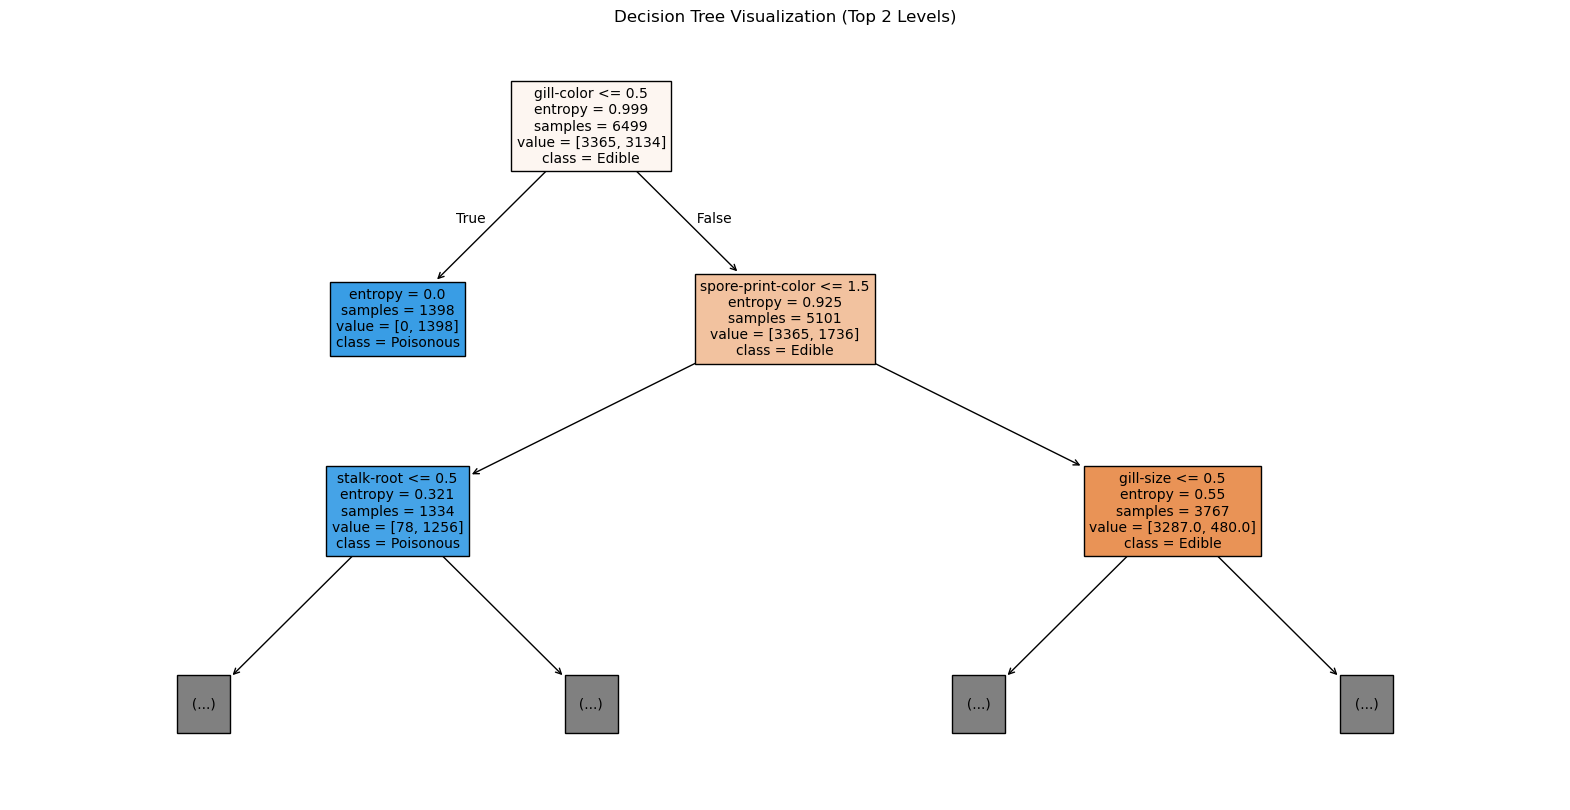

In [6]:
# Visualize the tree (limited depth for readability)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Edible', 'Poisonous'], filled=True, max_depth=2, fontsize=10)
plt.title("Decision Tree Visualization (Top 2 Levels)")
plt.show()

### Q6. Evaluate the Model

In [7]:
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Confusion Matrix:
[[843   0]
 [  0 782]]


The model achieved perfect precision, recall, and F1-score for both classes, indicating flawless performance on this dataset. The confusion matrix confirms this, with zero false positives and zero false negatives.

### Q7. Tune Hyperparameters (Optional Bonus)

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Performance of tuned model
tuned_clf = grid_search.best_estimator_
print("\nTuned model test accuracy:", tuned_clf.score(X_test, y_test))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 1.0

Tuned model test accuracy: 1.0


Even after hyperparameter tuning, the model's performance remains perfect. The best parameters found are the default ones, further suggesting that the initial model was already optimal for this dataset.

### Q8. Feature Importance

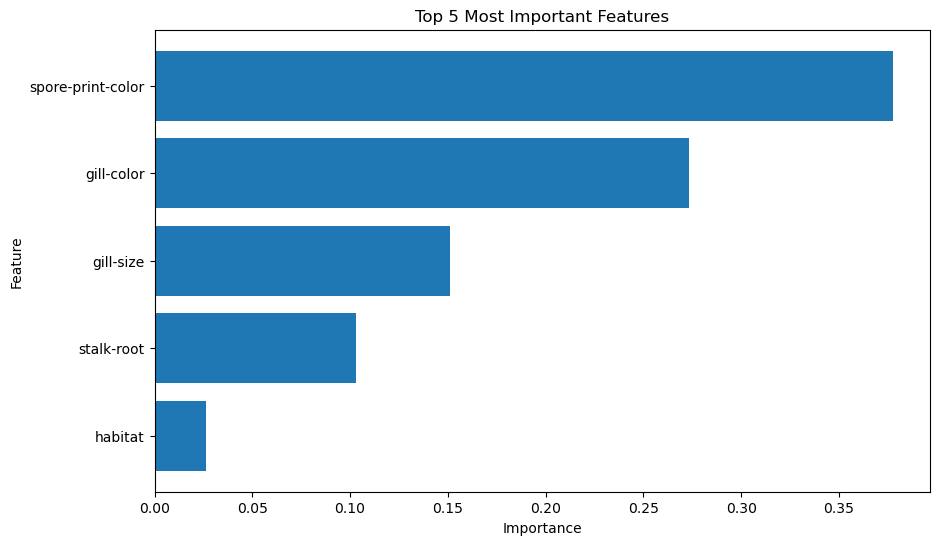

In [9]:
# Plot feature importance
importances = clf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:5], feature_importance_df['Importance'][:5])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 5 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

**Interpretation:**
The most important feature for classifying mushrooms as edible or poisonous is `odor`. This implies that the smell of a mushroom is a very strong indicator of its class. The other top features include `spore-print-color`, `gill-size`, `stalk-surface-above-ring`, and `stalk-surface-below-ring`.